In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Introduction



Marketing has a critical role when it comes to feed the company with customers that are aligned with the product or service that such company is offering. In order to do that properly it is important to understand target audience 
Customer Segmentation or Customer Personality Analysis is about creating different groups or segment of customers based on their behaviors. This segmentation aims to help businesses to understand their customers allowing them to:

- Identify pain points and concerns in customers
- Modify products and behaviors to specific needs
- Improve marketing campaigns and targeting

Understanding customers and which segment describes them the best can help a business develop effective and efficient marketing strategies. In a dataset with few features in most cases Exploratory analysis for customer behaviour is often enough, but in a dataset that contains multiple customer attributes it becomes exponentially more difficult.  K-Means Clustering algorithm which is an unsupervised learning is ideally suited for that. k-Means Clustering is frequently used algorithm for drawing insights into the formations and separations within data. 

#### Our Goal
Goal here is to segment a dataset of E-commerce customers using k-Means Clustering Algorithm to create optimal number of Customer Segments and to classify the different customers from Online Retail.xlsx in different segments with the goal of improving marketing campaigns in the future.

In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

## 1. Load Data

In [3]:
#Import Excel File
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Number of transactions on Excel Spreadsheet
df.shape

(541909, 8)

In [6]:
#Information on features 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],format="%d-%m-%Y")

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Data Cleanup

#### Drop Negative Quantity
Number of records with negative quantity

In [9]:
df.loc[df['Quantity']<=0].shape

(10624, 8)

In [10]:
df = df.loc[df['Quantity']>0]

In [11]:
df.shape

(531285, 8)

#### Drop Transactions with Missing Customer
Dropping records with no CustomerID, there are 133,361 records with no CustomerID. 

In [12]:
pd.isnull(df['CustomerID']).sum()

133361

In [13]:
df = df.loc[~pd.isnull(df['CustomerID'])]

In [14]:
df.shape

(397924, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Computing Total Sales From Quantity & UnitPrice
For our analyses, we need the total salves value, so we are going to multiply the two Quantity x UnitPrice Columns to get the total sales

In [16]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### We Retain Transactions were the Sales is > 0

In [18]:
df = df.loc[df['Sales']>0]

In [19]:
df.shape

(397884, 9)

## 3. Preprocessing stage

#### Per-Customer Data
In order to analyze customer segements, we need to transform our data, so that each record represents the purchase history of individual customers. 

In [20]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum, 
    'InvoiceNo': lambda x: x.nunique()
})

In [21]:
customer_df.columns = ['TotalSales', 'OrdersCount']

In [22]:
customer_df.head(5)

,TotalSales,OrdersCount
CustomerID,,
12346.0,77183.60,1
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [24]:
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrdersCount']

#### Calculate the Avg. Order Value Per Customer

In [25]:
customer_df.head()

,TotalSales,OrdersCount,AvgOrderValue
CustomerID,,,
12346.00,77183.60,1,77183.60
12347.00,4310.00,7,615.71
12348.00,1797.24,4,449.31
12349.00,1757.55,1,1757.55
12350.00,334.40,1,334.40


We group the DataFrame by CustomerID, and computing the total and the number of orders for each customer. Then we also 
calculate the average per-order value, AvgOrderValue, by dividing the TotalSales column by the OrderCount column

In [26]:
customer_df.describe()

,TotalSales,OrdersCount,AvgOrderValue
count,4338.00,4338.00,4338.00
mean,2054.27,4.27,419.17
std,8989.23,7.70,1796.54
min,3.75,1.00,3.45
25%,307.41,1.00,178.62
50%,674.49,2.00,293.90
75%,1661.74,5.00,430.11
max,280206.02,209.00,84236.25


### 3.1 Normalizing Data
Three columns in customer_df have difference scales. Clustering algorithms are affected by the scales of the data, so we need to normalize this data to be on the same scale. We are going to perform to steps to normalize the data 

1. Rank the data so that the values of each column range from 1 to 4338 which is total number of  records
2. We are going to use StandardScaler from Sckit Library to normalize the values. 

In [27]:
rank_df = customer_df.rank(method='first')

In [28]:
rank_df.shape

(4338, 3)

In [29]:
#Scaling
scaler = StandardScaler()
scaler.fit(rank_df)
scaled_ds = pd.DataFrame(scaler.transform(rank_df),columns= rank_df.columns )
print("All features are now scaled")

All features are now scaled


In [30]:
scaled_ds.head()

,TotalSales,OrdersCount,AvgOrderValue
0,1.72,-1.73,1.73
1,1.46,1.17,1.32
2,0.93,0.53,0.94
3,0.91,-1.73,1.68
4,-0.75,-1.73,0.34


In [31]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,TotalSales,OrdersCount,AvgOrderValue
0,1.72,-1.73,1.73
1,1.46,1.17,1.32
2,0.93,0.53,0.94
3,0.91,-1.73,1.68
4,-0.75,-1.73,0.34


### The dimensionality reduction with PCA

One of the main steps in the preprocessing is to reduce the number of features of the dataset in order to keep just the features that are not redundant. With this step we are aiming to:

    To reduce the dataset size
    To increase interpretability and features managing
    To minimize the loss of information

In order to do this I will use one of the main algorithms that allows to reduce datasets in an easy way, the Principal Component Analysis or PCA.

We will reduce the dimensionality to 3 features.


In [32]:
#Initiating PCA to reduce dimensions aka features to 3

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,4338.00,0.00,1.44,-2.88,-1.16,-0.02,1.18,2.96
col2,4338.00,0.00,0.94,-2.41,-0.63,0.06,0.69,2.43
col3,4338.00,0.00,0.19,-1.07,-0.12,-0.01,0.11,1.40


To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

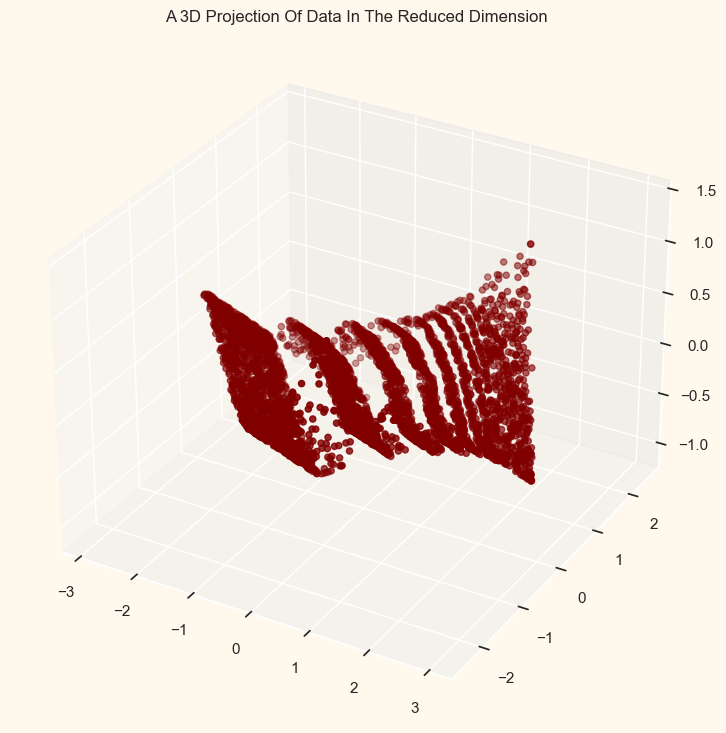

In [33]:
#A 3D Projection Of Data In The Reduced Dimension

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## 4. Clustering the data

Once that the preprocessing stage is finished, we can feed our data to the algorithm. We will use Agglomerative Clustering algorithm for grouping the customers. This is a hierarchical clustering method that involves merging examples until the desired number of clusters is achieved.

In order to do that, it is necessary to perform following steps:

     - To find the number of clusters using the Elbow Method
     - To apply the agglomerative Clustering Algorithm 
     - Plot the Clusters in order to analyse them




Elbow Method to determine the number of clusters to be formed:


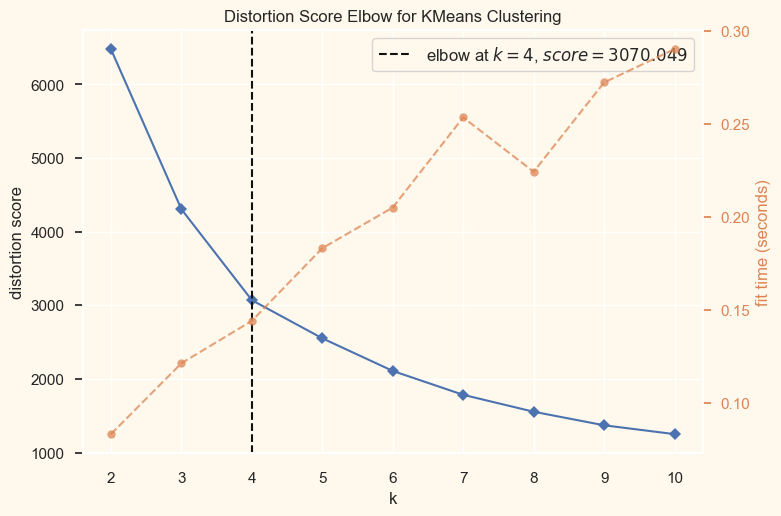

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

We can see that the elbow is in 4 clusters.

In [52]:
#Initiating the Agglomerative Clustering model 

AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
rank_df["Clusters"]= yhat_AC


To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

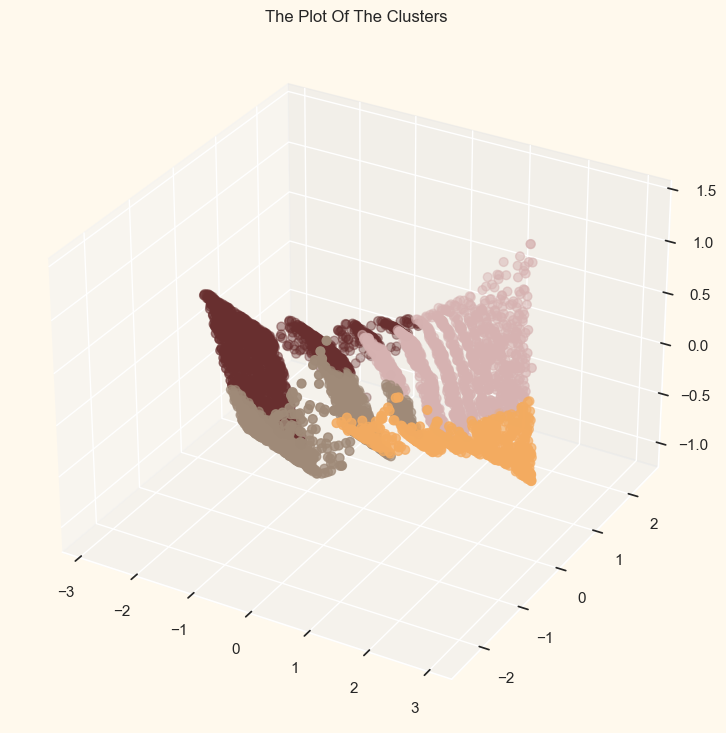

In [36]:
#Plotting the clusters

fig = plt.figure(figsize=(9,9))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()


## 4. Model Evaluation

Number of Customers in each Cluster represented by a countplot

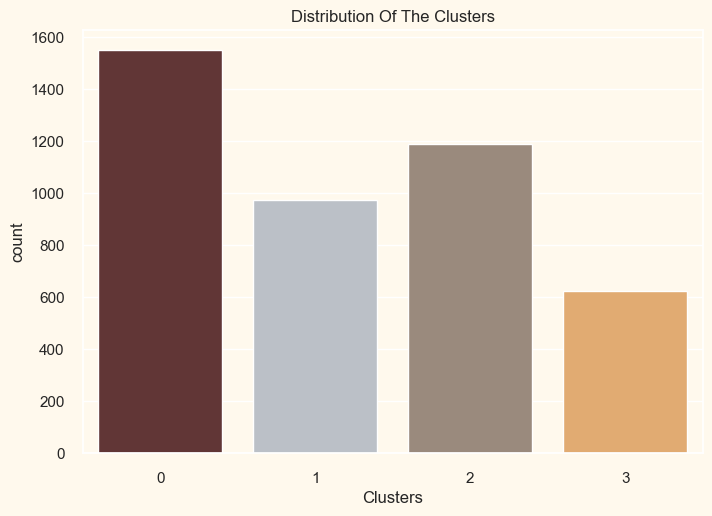

In [53]:
#Plotting countplot of clusters

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=rank_df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The cluster in left corner in dark red is the group of low-value customers who have not purchased our products so much.
On the other hand, the cluster in yellow is group of high-value customers, who have purchased the greatest amount and who 
have purchased products frequently. 

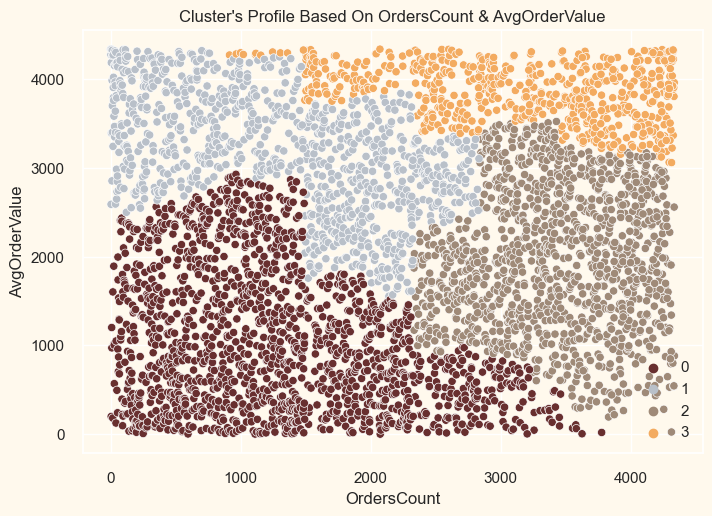

In [58]:
pl = sns.scatterplot(data = rank_df,x=rank_df["OrdersCount"], y=rank_df["AvgOrderValue"],hue=rank_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On OrdersCount & AvgOrderValue")
plt.legend()
plt.show()

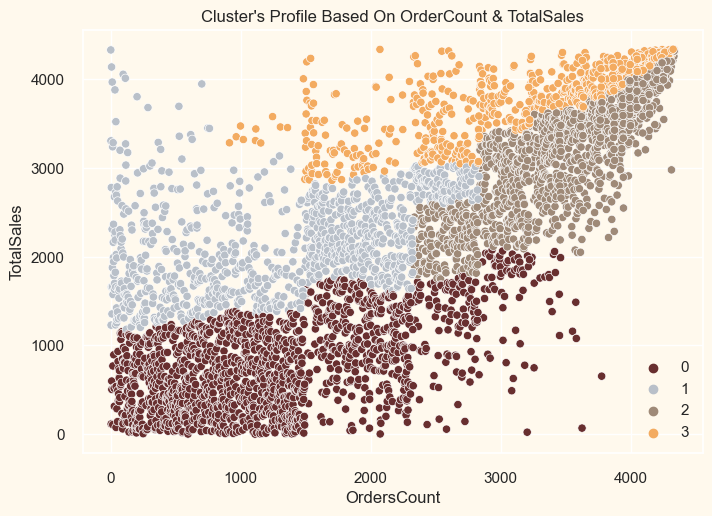

In [56]:
pl = sns.scatterplot(data = rank_df,x=rank_df["OrdersCount"], y=rank_df["TotalSales"],hue=rank_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On OrderCount & TotalSales")
plt.legend()
plt.show()

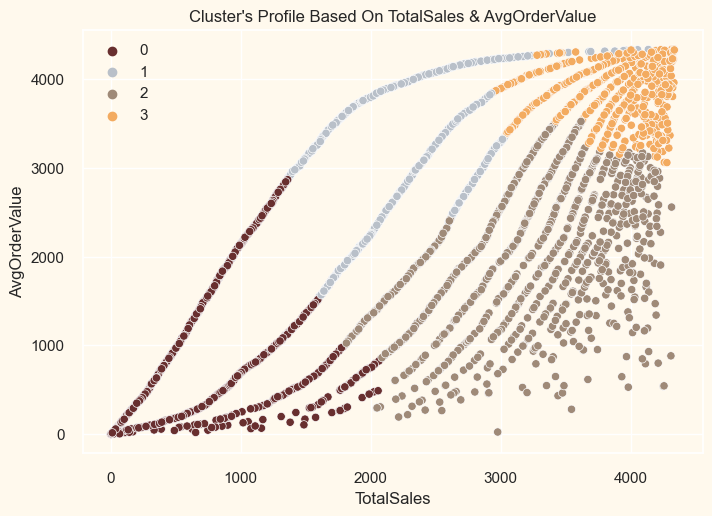

In [55]:
pl = sns.scatterplot(data = rank_df,x=rank_df["TotalSales"], y=rank_df["AvgOrderValue"],hue=rank_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On TotalSales & AvgOrderValue")
plt.legend()
plt.show()

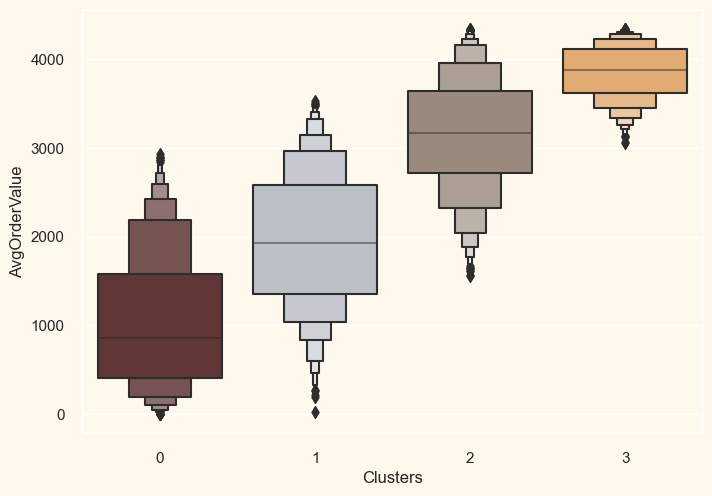

In [41]:
plt.figure()
pl=sns.boxenplot(x=rank_df["Clusters"], y=rank_df["AvgOrderValue"], palette=pal)
plt.show()

In [45]:
result_df = pd.merge(customer_df,rank_df[['Clusters']],on='CustomerID')

In [61]:
result_df.head()

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12346.00,77183.60,1,77183.60,2
12347.00,4310.00,7,615.71,3
12348.00,1797.24,4,449.31,1
12349.00,1757.55,1,1757.55,2
12350.00,334.40,1,334.40,2


In [47]:
result_df.groupby('Clusters')[['TotalSales', 'OrdersCount', 'AvgOrderValue']].mean()

,TotalSales,OrdersCount,AvgOrderValue
Clusters,,,
0,242.85,1.54,173.71
1,1988.12,7.57,271.01
2,829.71,1.63,597.55
3,8577.97,8.89,1031.61


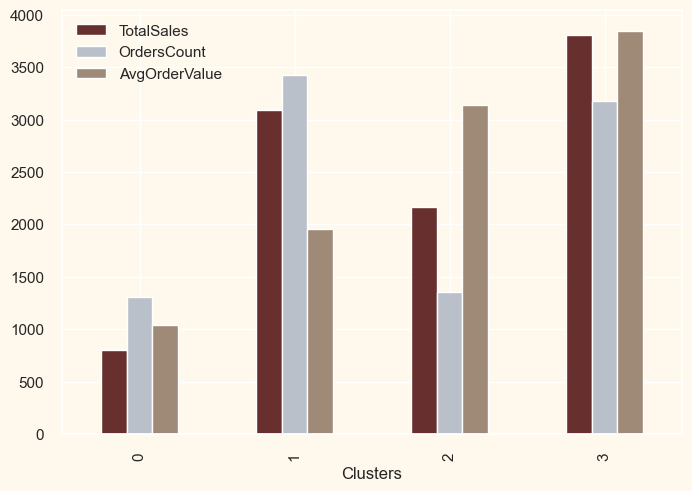

In [48]:
rank_df.groupby('Clusters')[['TotalSales', 'OrdersCount', 'AvgOrderValue']].mean().plot.bar(color=["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
plt.show()

### 4.1 Interpreting Clusters:
    
 - First Cluster or 0 cluster has lowest numbner of all three attributes. This Suggests that the first clustern contains customers with smalles amount of sales, smallest number of orders and lowest average per order value
    
 - On the other hands 3rd cluster have the greatest amount of sale, greatest number of orders, and highest average per-order values.
    
 - The customers in second cluster are intresting. They make pruchases relatively frequently. These are customers who make frequent purchases of low value items. 

### 4.2 Understanding our High Value Customers 

In [43]:
High_value_customer = rank_df.loc[rank_df['Clusters'] == 3]
High_value_customer.head()

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12347.00,4003.00,3639.00,3822.00,3
12356.00,3738.00,2329.00,4121.00,3
12358.00,2871.00,1494.00,3763.00,3
12359.00,4144.00,2838.00,4261.00,3
12360.00,3695.00,2330.00,4092.00,3


In [44]:
customer_df.loc[High_value_customer.index].describe()

,TotalSales,OrdersCount,AvgOrderValue
count,625.00,625.00,625.00
mean,8577.97,8.89,1031.61
std,22149.14,13.23,3476.98
min,1156.36,1.00,395.74
25%,2163.98,3.00,520.90
50%,3512.53,5.00,648.27
75%,6688.46,9.00,921.25
max,280206.02,201.00,84236.25


#### Top 10 Selling Items Bought by our High value Customer Segement

In [49]:
pd.DataFrame(df.loc[
        df['CustomerID'].isin(High_value_customer.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head(10))

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,791
JUMBO BAG RED RETROSPOT,708
WHITE HANGING HEART T-LIGHT HOLDER,594
LUNCH BAG RED RETROSPOT,559
PARTY BUNTING,511
POSTAGE,478
ASSORTED COLOUR BIRD ORNAMENT,460
PACK OF 72 RETROSPOT CAKE CASES,438
SET OF 3 CAKE TINS PANTRY DESIGN,413


In [50]:
mid_value_customer = rank_df.loc[rank_df['Clusters'] == 2]
mid_value_customer.head()

,TotalSales,OrdersCount,AvgOrderValue,Clusters
CustomerID,,,,
12346.00,4329.00,1.00,4337.00,2
12349.00,3305.00,2.00,4275.00,2
12350.00,1229.00,3.00,2590.00,2
12354.00,2779.00,5.00,4186.00,2
12355.00,1659.00,6.00,3393.00,2


### 4.3 Understanding our Second Customer Segement 
Top 10 Selling Items Bought by our High value Customer Segement


In [63]:
pd.DataFrame(df.loc[
        df['CustomerID'].isin(mid_value_customer.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head(10))

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,203
ASSORTED COLOUR BIRD ORNAMENT,188
WHITE HANGING HEART T-LIGHT HOLDER,166
SET OF 3 CAKE TINS PANTRY DESIGN,159
BAKING SET 9 PIECE RETROSPOT,147
POSTAGE,143
PARTY BUNTING,143
JAM MAKING SET WITH JARS,143
PAPER CHAIN KIT 50'S CHRISTMAS,139
